<a href="https://colab.research.google.com/github/deepikag123/machinelearning/blob/main/projecthandwrittendigit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import svm
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report

In [13]:
from google.colab import files
uploaded = files.upload()

Saving test.csv to test.csv
Saving train.csv to train.csv


In [14]:
!ls


drive  sample_data  test.csv  train.csv


In [15]:
import pandas as pd

# Read the CSV files
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

# Display the first few rows of each DataFrame to verify
print("Train Data:")
print(train_data.head())

print("\nTest Data:")
print(test_data.head())


Train Data:
   label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0      1       0       0       0       0       0       0       0       0   
1      0       0       0       0       0       0       0       0       0   
2      1       0       0       0       0       0       0       0       0   
3      4       0       0       0       0       0       0       0       0   
4      0       0       0       0       0       0       0       0       0   

   pixel8  ...  pixel774  pixel775  pixel776  pixel777  pixel778  pixel779  \
0       0  ...         0         0         0         0         0         0   
1       0  ...         0         0         0         0         0         0   
2       0  ...         0         0         0         0         0         0   
3       0  ...         0         0         0         0         0         0   
4       0  ...         0         0         0         0         0         0   

   pixel780  pixel781  pixel782  pixel783  
0         0       

In [16]:
# Load the training and test datasets using absolute paths
train_data = pd.read_csv(r"/content/train.csv")
test_data = pd.read_csv(r"/content/test.csv")

In [17]:
# Assuming the label column is named 'label' and the rest are pixel columns
# Adjust according to your actual dataset structure
X_train = train_data.drop(columns='label').values
y_train = train_data['label'].values

In [18]:
# Since the test data does not have labels, we will split train_data for this example
# In a real scenario, you would need the test labels to evaluate the model
X_train_split, X_test_split = X_train[:33600], X_train[33600:]
y_train_split, y_test_split = y_train[:33600], y_train[33600:]

In [19]:
# Standardize the data
scaler = StandardScaler()
X_train_split = scaler.fit_transform(X_train_split)
X_test_split = scaler.transform(X_test_split)

In [20]:
# Build the model
model = svm.SVC(kernel='linear', C=2, random_state=42)

In [21]:
# Train the model
model.fit(X_train_split, y_train_split)

SVC(C=2, kernel='linear', random_state=42)

In [22]:
# Make predictions
y_pred = model.predict(X_test_split)

In [23]:
# Compute confusion matrix
cm = confusion_matrix(y_test_split, y_pred)

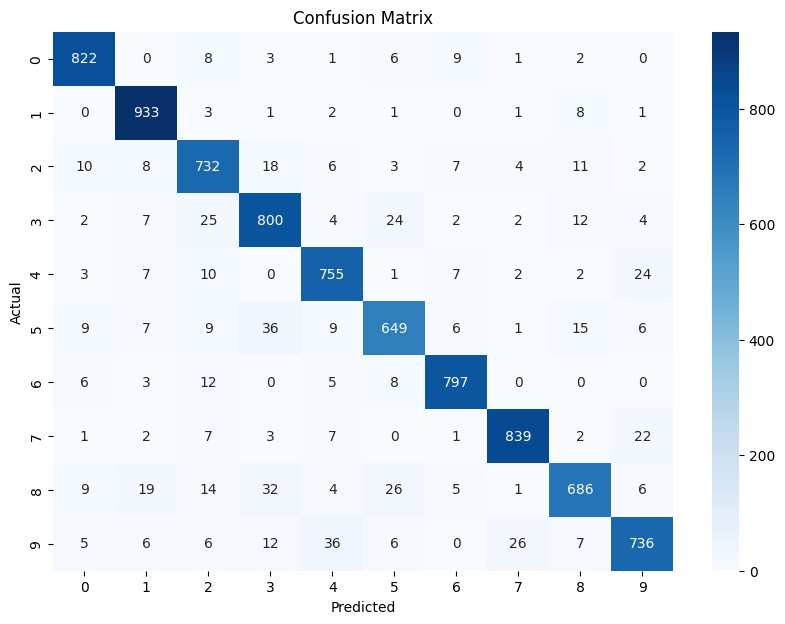

In [24]:
# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.arange(10), yticklabels=np.arange(10))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [25]:
# Print classification report
print("Classification Report:")
print(classification_report(y_test_split, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.96      0.96       852
           1       0.94      0.98      0.96       950
           2       0.89      0.91      0.90       801
           3       0.88      0.91      0.90       882
           4       0.91      0.93      0.92       811
           5       0.90      0.87      0.88       747
           6       0.96      0.96      0.96       831
           7       0.96      0.95      0.95       884
           8       0.92      0.86      0.89       802
           9       0.92      0.88      0.90       840

    accuracy                           0.92      8400
   macro avg       0.92      0.92      0.92      8400
weighted avg       0.92      0.92      0.92      8400



In [26]:
# Plot some predictions
def plot_predictions(data, target, predictions):
    fig, axes = plt.subplots(2, 5, figsize=(10, 5))
    for i, ax in enumerate(axes.flat):
        ax.imshow(data[i].reshape(28, 28), cmap='gray')  # Adjust the reshape size if needed
        ax.set_title(f'Pred: {predictions[i]}\nTrue: {target[i]}')
        ax.axis('off')
    plt.show()

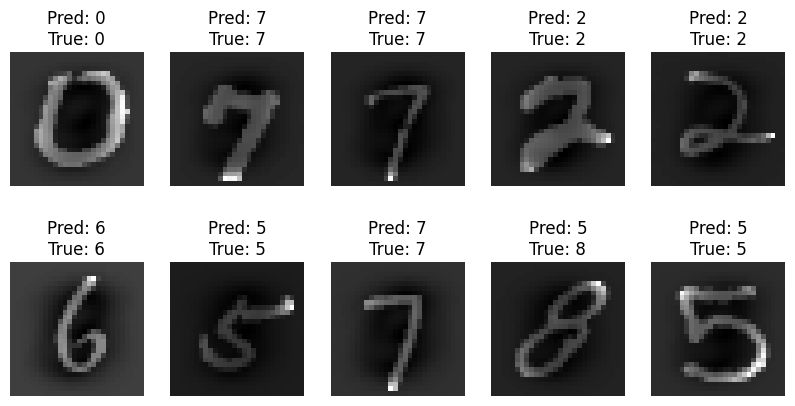

In [27]:
# Plot predictions on the test set
plot_predictions(X_test_split, y_test_split, y_pred)